In [4]:
import pandas as pd
from twitterscraper import scrapeProfile

## Scrape your profile into a csv
Set twitterUser to your Twitter handle.

In [ ]:
twitterUser = 'yourTwitterHandleHere'

scrapeProfile(twitterUser, twitterUser+'.csv')

## Open the created CSV in pandas and clean up data

In [5]:
# function for converting like counts such as 3.3k into numbers 3300
def convert_to_string(row):
    try:
        if type(row) == type(str()):
            if row.find('K') != -1:
                row = row.replace('.', '')
                row = row.replace('K', '')
                row = row + '00'
                return(int(row))
            else:
                return(int(row))
        else:
            return(row)
    except:
        print(row)

In [6]:
df = pd.read_csv('dankornas.csv')
df = df.drop(['User','Handle'], axis=1)
df = df.fillna(0)

df['LikeCount'] = df['LikeCount'].apply(convert_to_string)
df[['ReplyCount', 'RetweetCount', 'LikeCount']] = df[['ReplyCount', 'RetweetCount', 'LikeCount']].astype(int)

df.PostDate = pd.to_datetime(df.PostDate)

In [7]:
df

,PostDate,TweetText,ReplyCount,RetweetCount,LikeCount
0,2021-12-22 21:34:45+00:00,"I'm definitely the left side, still have to ex...",0,0,1
1,2021-12-22 15:33:47+00:00,Looks about right And then debugging every st...,0,1,4
2,2021-12-22 11:35:59+00:00,Day 5 of #100DaysOfCode \n\nAfter scraping MY ...,13,13,56
3,2021-12-21 21:13:34+00:00,"Day 4 of #100DaysOfCode \n\nToday was a ""clean...",0,11,6
4,2021-12-21 16:58:07+00:00,Important Statistics #DataScientists Need to ...,0,2,8
...,...,...,...,...,...
220,2021-06-29 15:13:42+00:00,I have a feeling there is going to be a GPT-3 ...,0,0,1
221,2021-06-29 07:52:50+00:00,Docker is one of these most essential tools ne...,0,0,0
222,2021-06-27 19:23:25+00:00,Excellent thread. On point! #MachineLearningA...,0,0,1
223,2021-06-26 08:23:54+00:00,A clutter free desk = a clutter free mind. It'...,0,0,0


## Create new features from dates

In [8]:
# extract month feature
months = df.PostDate.dt.month
months = pd.DataFrame(months)
months.columns = ['months']

# extract day of month feature
day_of_months = df.PostDate.dt.day
day_of_months = pd.DataFrame(day_of_months)
day_of_months.columns = ['day_of_months']

# extract hour feature
hours = df.PostDate.dt.hour
hours = pd.DataFrame(hours)
hours.columns = ['hours']

# extract the day name literal
days = df.PostDate.dt.day_name()
days = pd.DataFrame(days)
days.columns = ['days']

# is_weekend flag 
day_names = df.PostDate.dt.day_name()
is_weekend = day_names.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)

is_weekend = pd.DataFrame(is_weekend)
is_weekend.columns = ['is_weekend']

In [9]:
features = pd.concat([hours, days, day_of_months, months, is_weekend], axis=1)
df_new = pd.concat([df, features], axis=1)
df_new

,PostDate,TweetText,ReplyCount,RetweetCount,LikeCount,hours,days,day_of_months,months,is_weekend
0,2021-12-22 21:34:45+00:00,"I'm definitely the left side, still have to ex...",0,0,1,21,Wednesday,22,12,0
1,2021-12-22 15:33:47+00:00,Looks about right And then debugging every st...,0,1,4,15,Wednesday,22,12,0
2,2021-12-22 11:35:59+00:00,Day 5 of #100DaysOfCode \n\nAfter scraping MY ...,13,13,56,11,Wednesday,22,12,0
3,2021-12-21 21:13:34+00:00,"Day 4 of #100DaysOfCode \n\nToday was a ""clean...",0,11,6,21,Tuesday,21,12,0
4,2021-12-21 16:58:07+00:00,Important Statistics #DataScientists Need to ...,0,2,8,16,Tuesday,21,12,0
...,...,...,...,...,...,...,...,...,...,...
220,2021-06-29 15:13:42+00:00,I have a feeling there is going to be a GPT-3 ...,0,0,1,15,Tuesday,29,6,0
221,2021-06-29 07:52:50+00:00,Docker is one of these most essential tools ne...,0,0,0,7,Tuesday,29,6,0
222,2021-06-27 19:23:25+00:00,Excellent thread. On point! #MachineLearningA...,0,0,1,19,Sunday,27,6,1
223,2021-06-26 08:23:54+00:00,A clutter free desk = a clutter free mind. It'...,0,0,0,8,Saturday,26,6,1


## Look at your stats

<AxesSubplot:title={'center':'Avg Number of Likes based on hour posted (INCLUDING Viral Tweets)'}, xlabel='Hour', ylabel='Avg Number of Likes'>

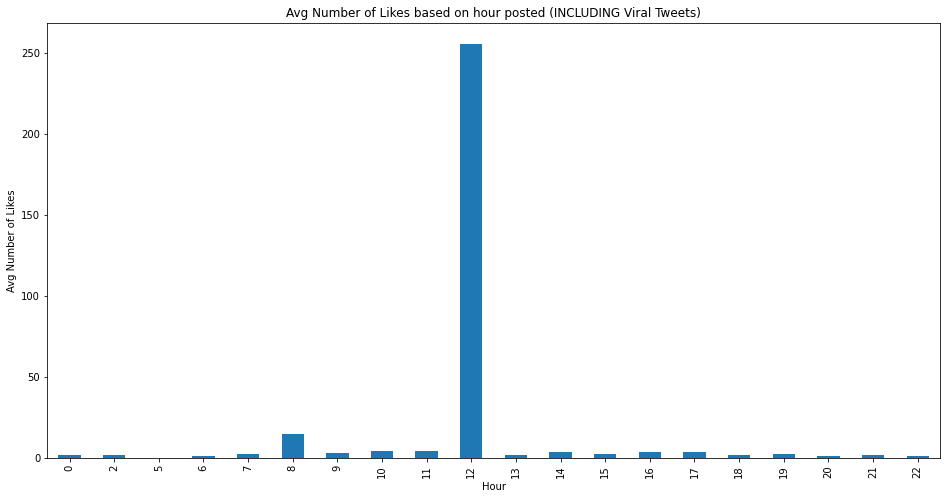

In [10]:
df_new.groupby(['hours'])['LikeCount'].mean().plot.bar(title='Avg Number of Likes based on hour posted (INCLUDING Viral Tweets)', xlabel='Hour', ylabel='Avg Number of Likes', figsize=(16,8))

<AxesSubplot:title={'center':'Avg Number of Likes based on hour posted (not including Viral Tweets)'}, xlabel='Hour', ylabel='Avg Number of Likes'>

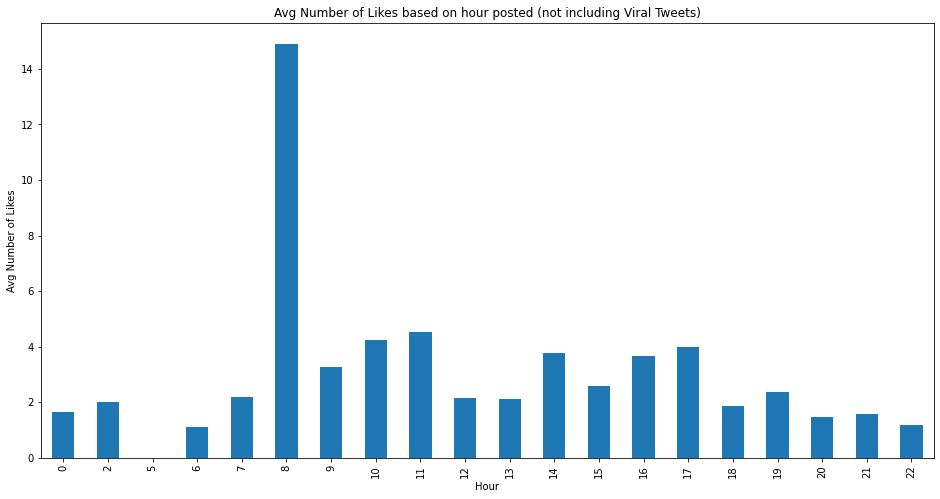

In [11]:
df_new[df['LikeCount']<1000].groupby(['hours'])['LikeCount'].mean().plot.bar(title='Avg Number of Likes based on hour posted (not including Viral Tweets)', xlabel='Hour', ylabel='Avg Number of Likes', figsize=(16,8))

<AxesSubplot:title={'center':'Total number of tweets posted each hour'}, xlabel='Hour', ylabel='Number of Tweets'>

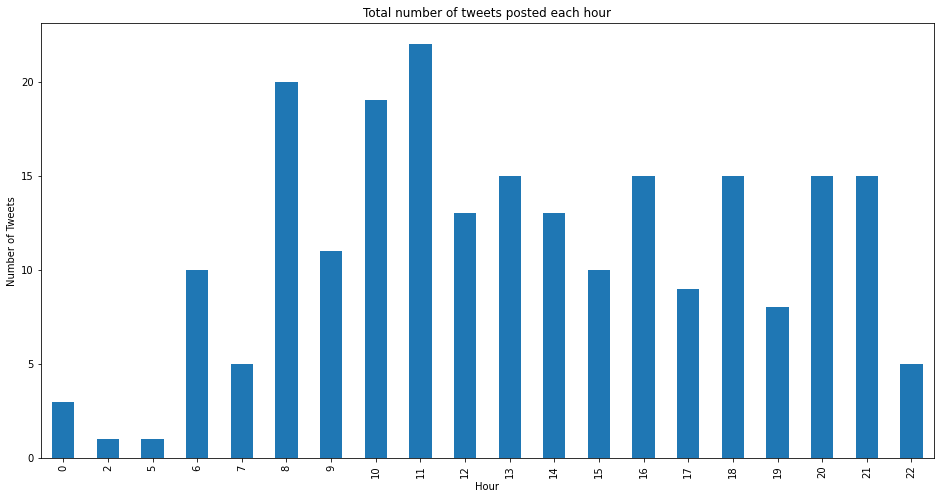

In [12]:
df_new.groupby(['hours'])['LikeCount'].count().plot.bar(title='Total number of tweets posted each hour', xlabel='Hour', ylabel='Number of Tweets', figsize=(16,8))

<AxesSubplot:title={'center':'Avg number of likes for each day of the week (without Viral Tweets)'}, xlabel='Day of the Week', ylabel='Number of Likes'>

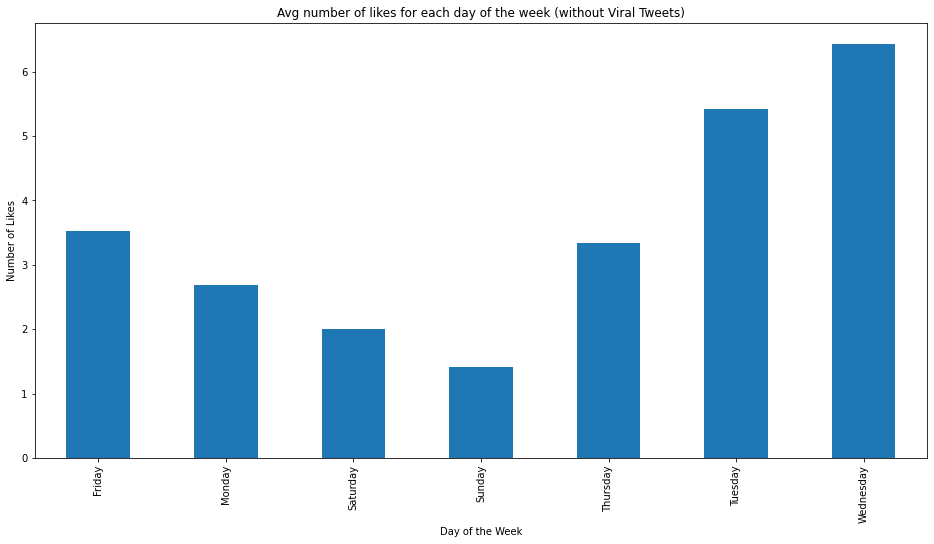

In [13]:
df_new[df['LikeCount']<1000].groupby(['days'])['LikeCount'].mean().plot.bar(title='Avg number of likes for each day of the week (without Viral Tweets)', xlabel='Day of the Week', ylabel='Number of Likes', figsize=(16,8))

<AxesSubplot:title={'center':'Avg number of likes for each day of the week (with Viral Tweets)'}, xlabel='Day of the Week', ylabel='Number of Likes'>

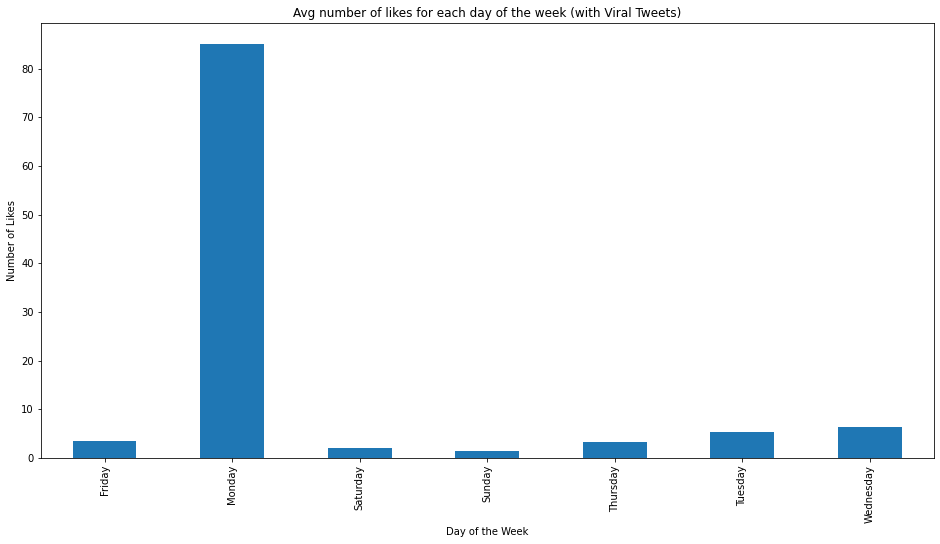

In [14]:
df_new.groupby(['days'])['LikeCount'].mean().plot.bar(title='Avg number of likes for each day of the week (with Viral Tweets)', xlabel='Day of the Week', ylabel='Number of Likes', figsize=(16,8))

<AxesSubplot:title={'center':'Total number of likes per day (without Viral Tweets)'}, xlabel='Day of the Week', ylabel='Number of Likes'>

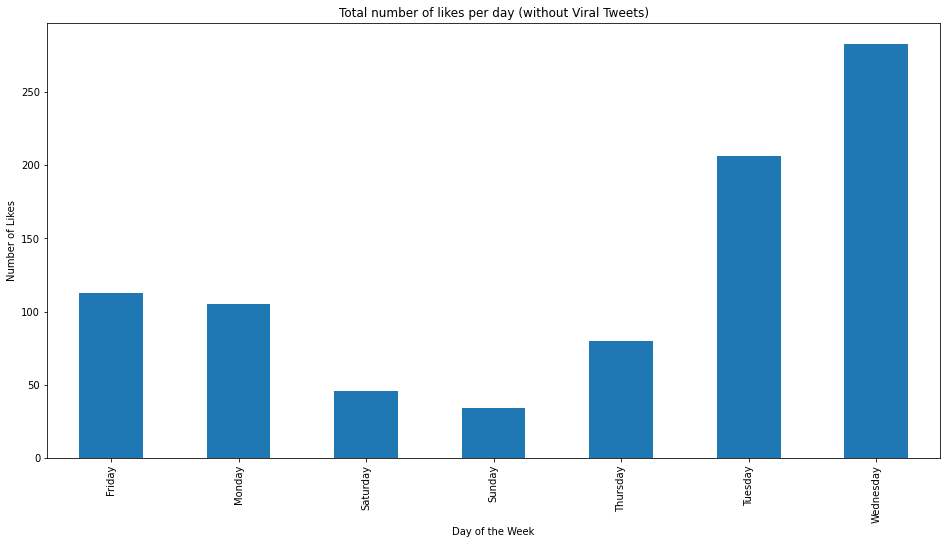

In [15]:
df_new[df['LikeCount']<1000].groupby(['days'])['LikeCount'].sum().plot.bar(title='Total number of likes per day (without Viral Tweets)', xlabel='Day of the Week', ylabel='Number of Likes', figsize=(16,8))

<AxesSubplot:title={'center':'Total number of likes per day (without Viral Tweets)'}, xlabel='Day of the Week', ylabel='Number of Likes'>

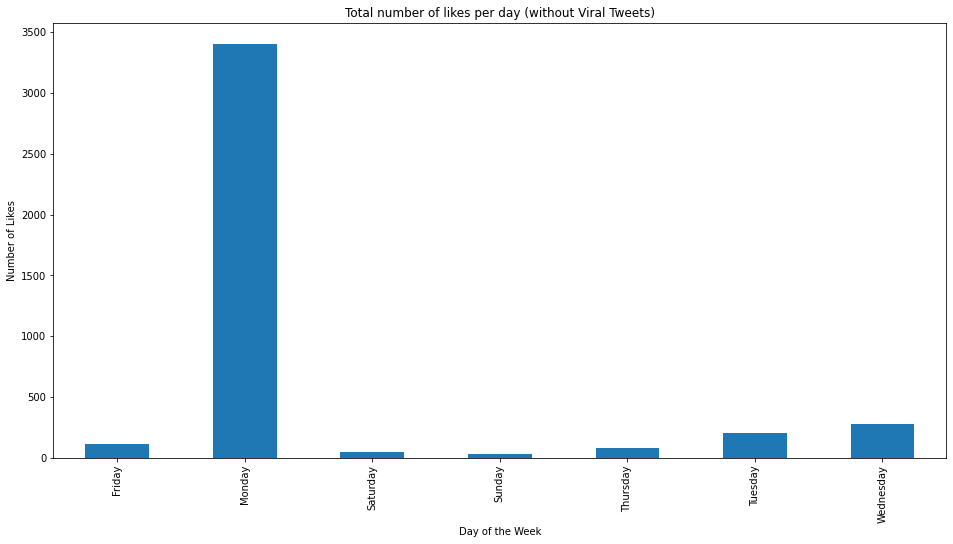

In [16]:
df_new.groupby(['days'])['LikeCount'].sum().plot.bar(title='Total number of likes per day (without Viral Tweets)', xlabel='Day of the Week', ylabel='Number of Likes', figsize=(16,8))